<a href="https://colab.research.google.com/github/estherc247/cz4041_ML/blob/main/Testing_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import data from Google Drive 
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#Load Data
data_dir_train = '/content/gdrive/MyDrive/Y4/CZ4041_Machine_Learning/plant_data/train.zip'
data_dir_test = '/content/gdrive/MyDrive/Y4/CZ4041_Machine_Learning/plant_data/test.zip'

#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile(data_dir_train, 'r') #Opens the zip file in read mode
zip_test = zipfile.ZipFile(data_dir_test, 'r')
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_test.extractall('/tmp')
zip_ref.close()
zip_test.close()

In [3]:
#Import Libraries 
import tensorflow as tf 
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd 
from PIL import Image
import glob

In [4]:
#Define directory path
train_url = '/tmp/train'
test_url ='/tmp/test'

In [5]:
#define parameters 
batch_size = 32
img_width = 240
img_height = 240 
epochs = 30

In [6]:
#Split data 

train_image_data = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1.0/255.0,
    horizontal_flip = True, 
    zoom_range=0.2, 
    shear_range = 0.2,
)

train_ds = train_image_data.flow_from_directory(
  train_url,
  shuffle = True,
  target_size=(img_height, img_width),
  class_mode = 'categorical',
  batch_size=batch_size,
  subset="training")

val_ds = train_image_data.flow_from_directory(
  train_url,
  shuffle = True,
  target_size=(img_height, img_width),
  class_mode = 'categorical',
  batch_size=batch_size,
  subset="validation")

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [8]:
#Create Model
from tensorflow.keras.applications.xception import Xception

model = tf.keras.Sequential([
            Xception(input_shape=[240,240, 3], include_top=False),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(12, activation='softmax')
])

model.trainable = True
model.get_layer('xception').trainable
model.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 37,640,372
Trainable params: 37,585,844
Non-trainable params: 54,528
_________________________________________________________________


In [9]:
#Compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Save model checkpoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [11]:
history = model.fit_generator(
                train_ds,
                steps_per_epoch = train_ds.samples//batch_size,
                validation_data = val_ds, 
                validation_steps = val_ds.samples//batch_size,
                epochs = epochs,
                callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
118/118 [==============================] - 252s 2s/step - loss: 2.6619 - accuracy: 0.1867 - val_loss: 2.2246 - val_accuracy: 0.2231
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
118/118 [==============================] - 211s 2s/step - loss: 1.8897 - accuracy: 0.3869 - val_loss: 19.9639 - val_accuracy: 0.1595
Epoch 3/30
118/118 [==============================] - 209s 2s/step - loss: 0.8396 - accuracy: 0.7327 - val_loss: 2.2607 - val_accuracy: 0.5873
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/30
118/118 [==============================] - 209s 2s/step - loss: 0.4561 - accuracy: 0.8565 - val_loss: 1.5448 - val_accuracy: 0.7791
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/30
118/118 [==============================] - 208s 2s/step - loss: 0.3875 - accuracy: 0.8809 - val_loss: 0.5748 - val_accuracy: 0.8513
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/30
118/118 [==============================] - 209s 2s/step - loss: 0.2593 - accuracy: 0.9149 - val_loss: 0.3280 - val_accuracy: 0.8987
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/30
118/118 [==============================] - 208s 2s/step - loss: 0.2710 - accuracy: 0.9159 - val_loss: 0.4277 - val_accuracy: 0.8534
Epoch 8/30
118/118 [==============================] - 208s 2s/step - loss: 0.2303 - accuracy: 0.9252 - val_loss: 0.7904 - val_accuracy: 0.8006
Epoch 9/30
118/118 [==============================] - 209s 2s/step - loss: 0.1978 - accuracy: 0.9393 - val_loss: 0.3920 - val_accuracy: 0.9062
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/30
118/118 [==============================] - 208s 2s/step - loss: 0.1664 - accuracy: 0.9507 - val_loss: 0.3548 - val_accuracy: 0.8858
Epoch 11/30
118/118 [==============================] - 208s 2s/step - loss: 0.1789 - accuracy: 0.9486 - val_loss: 0.4460 - val_accuracy: 0.9052
Epoch 12/30
118/118 [==============================] - 208s 2s/step - loss: 0.2691 - accuracy: 0.9191 - val_loss: 0.5671 - val_accuracy: 0.9095
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 13/30
118/118 [==============================] - 208s 2s/step - loss: 0.2582 - accuracy: 0.9279 - val_loss: 0.5728 - val_accuracy: 0.8707
Epoch 14/30
118/118 [==============================] - 208s 2s/step - loss: 0.1844 - accuracy: 0.9427 - val_loss: 0.3237 - val_accuracy: 0.9440
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 15/30
118/118 [==============================] - 225s 2s/step - loss: 0.1382 - accuracy: 0.9554 - val_loss: 0.3917 - val_accuracy: 0.9073
Epoch 16/30
118/118 [==============================] - 208s 2s/step - loss: 0.1488 - accuracy: 0.9581 - val_loss: 0.5533 - val_accuracy: 0.8373
Epoch 17/30
118/118 [==============================] - 207s 2s/step - loss: 0.1421 - accuracy: 0.9597 - val_loss: 0.6090 - val_accuracy: 0.8987
Epoch 18/30
118/118 [==============================] - 208s 2s/step - loss: 0.1243 - accuracy: 0.9621 - val_loss: 0.2620 - val_accuracy: 0.9569
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 19/30
118/118 [==============================] - 208s 2s/step - loss: 0.0963 - accuracy: 0.9703 - val_loss: 0.5965 - val_accuracy: 0.8858
Epoch 20/30
118/118 [==============================] - 207s 2s/step - loss: 0.1204 - accuracy: 0.9658 - val_loss: 0.4936 - val_accuracy: 0.8901
Epoch 21/30
118/118 [==============================] - 208s 2s/step - loss: 0.1146 - accuracy: 0.9706 - val_loss: 1.3582 - val_accuracy: 0.7317
Epoch 22/30
118/118 [==============================] - 207s 2s/step - loss: 0.1658 - accuracy: 0.9605 - val_loss: 0.5612 - val_accuracy: 0.9052
Epoch 23/30
118/118 [==============================] - 208s 2s/step - loss: 0.1324 - accuracy: 0.9674 - val_loss: 0.2909 - val_accuracy: 0.9256
Epoch 24/30
118/118 [==============================] - 208s 2s/step - loss: 0.1532 - accuracy: 0.9618 - val_loss: 3.7200 - val_accuracy: 0.6638
Epoch 25/30
118/118 [==============================] - 207s 2s/step - loss: 0.1611 - accuracy: 0.9509 - val_loss: 0.7515 - val_accuracy:

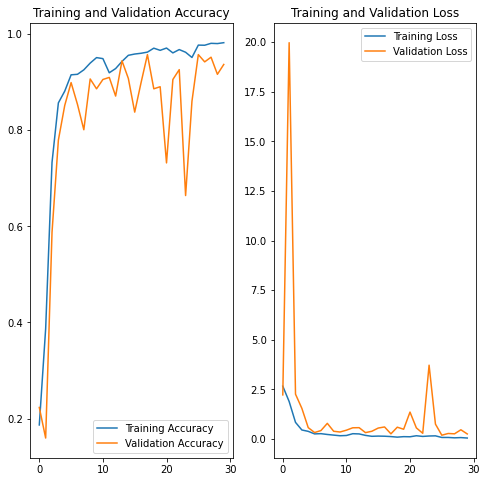

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#Apply model to test set 
#Initialise test generator
test_image_data = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds = test_image_data.flow_from_directory('/tmp/',
                                              classes = ['test'],
                                              target_size=(img_height,img_width),
                                              batch_size = 1,
                                              class_mode ='categorical',
                                              shuffle = False)

Found 794 images belonging to 1 classes.


In [ ]:
model.save('/tmp/checkpoint/new_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [17]:
model.evaluate_generator(generator=val_ds, steps=val_ds.samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2706887125968933, 0.9364224076271057]

In [18]:
test_ds.reset() #maintain test order
test_predictions = model.predict_generator(test_ds, test_ds.samples, verbose=1 )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


794/794 [==============================] - 17s 20ms/step


In [ ]:
predicted_plant_type = np.argmax(test_predictions, axis=1)

794

In [19]:
labels = (train_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_plant_type]

NameError: ignored

In [ ]:
#Change filenames to fit submission requirements 
'''
Current test file name = 'test/0021e90e4.png'
Required test file name = '0021e90e4.png'
'''
test_data = []
for name in range(len(test_ds.filenames)):
  test_data.append(test_ds.filenames[name].split('/')[1])

In [ ]:
#Find the class with the highest probability for each instance 
import pandas as pd

final_prob = []
for i in range(test_predictions.shape[0]):
  #Get index of plant with highest probability 
  max_prob = test_predictions[i,:].argmax(axis = -1)
  #append plant name into file
  final_prob.append(plant_type_list[max_prob])

final_sub = pd.DataFrame()
final_sub['file'] = test_data
final_sub['species'] = final_prob 

final_sub.to_csv('submission.csv', index=False)